In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.shape

(1372, 5)

In [7]:
# Split features and labels
X=df.drop('Class', axis=1)
y=df['Class']

In [8]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=13)

In [9]:
# Decision Tree Model
# Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best'
)
model.fit(X_train, y_train)

DecisionTreeClassifier()

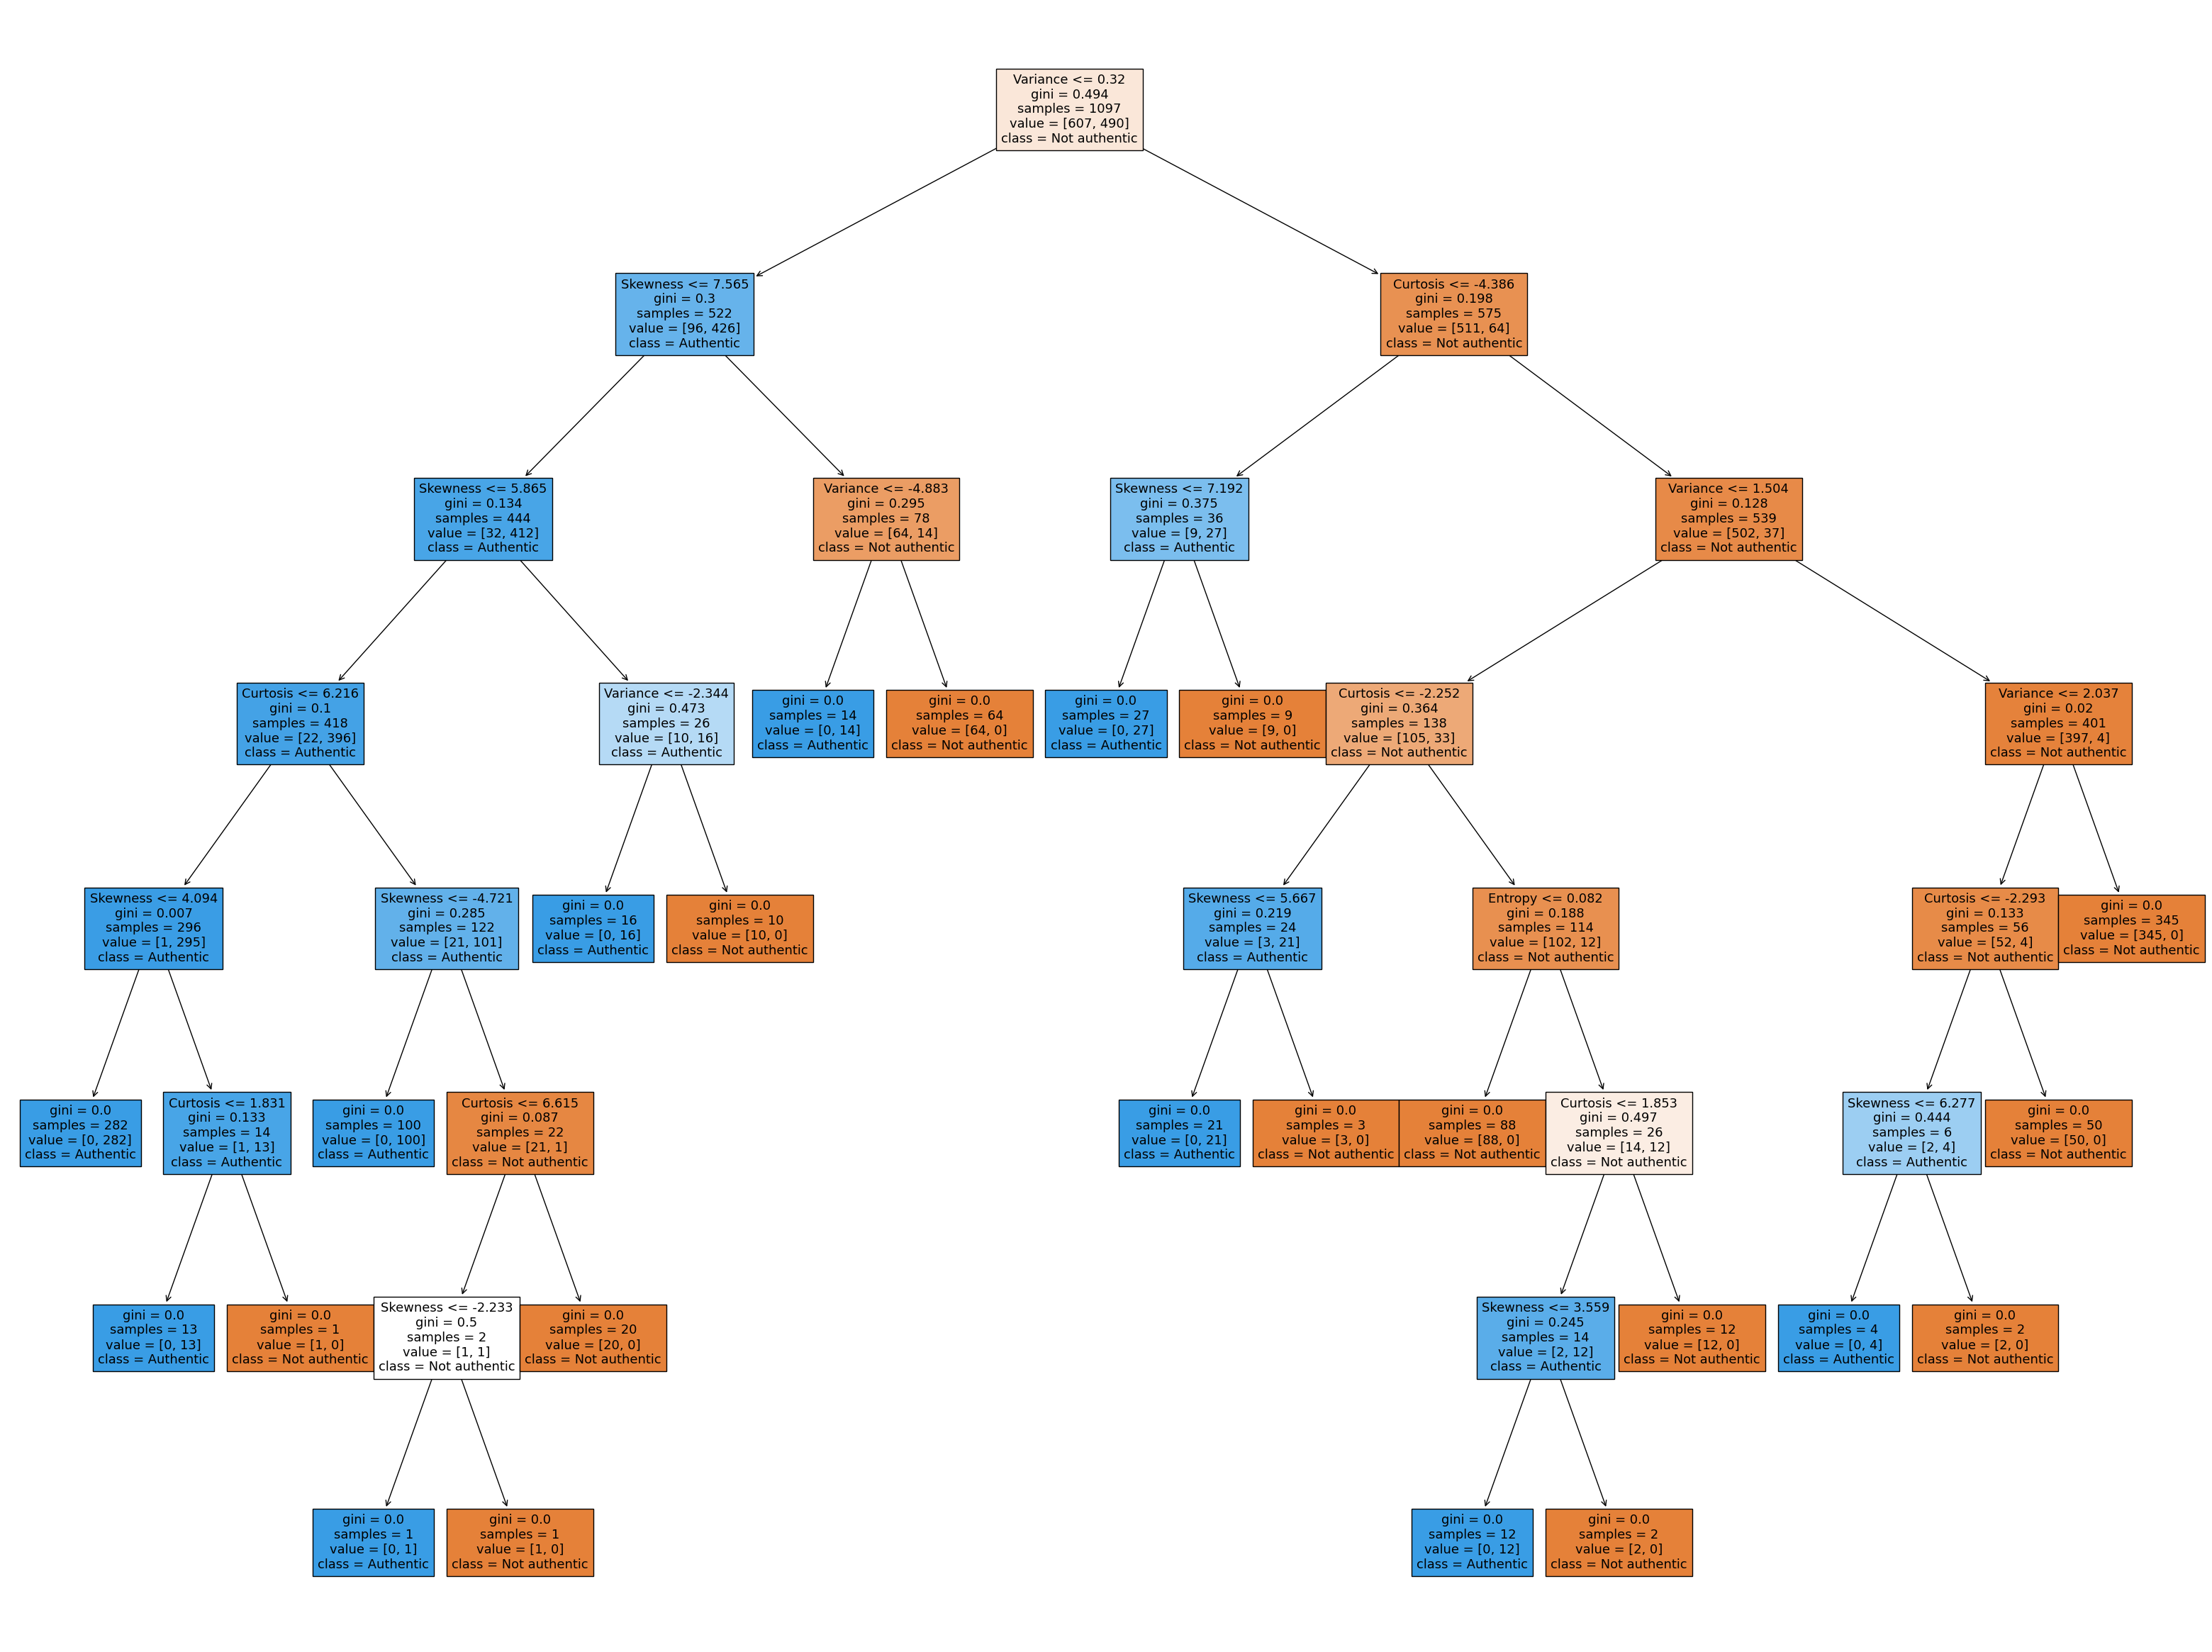

In [10]:
# Tree plotting
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(
    model,
    feature_names=['Variance','Skewness', 'Curtosis', 'Entropy'],
    class_names = ['Not authentic','Authentic'],
    filled = True
)
plt.show()

In [11]:
# Model prediction
y_pred = model.predict(X_test)

In [12]:
#Model evaluation
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, ConfusionMatrixDisplay
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

Accuracy: 0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.98      0.98      0.98       120

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



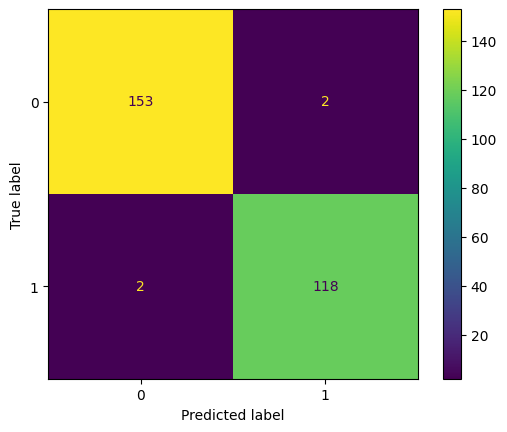

In [13]:
# Demo the evaluation
print('Accuracy:',acc)
print(classification_report(y_test,y_pred))
cm_display.plot()
plt.show()